# Notebook for Basic Analysis of our Preference Factors

## CW - EW

### import the data created in the data_creation notebook

In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
project_root = Path.cwd().parents[0]
sys.path.append(str(project_root))


In [3]:
from src.preference_factors.build_preference_dataset import (
    build_preference_factor_dataset
)

#### Monthly 

In [4]:
df_monthly = build_preference_factor_dataset(
    returns_file="sp500_returns_monthly_with_tickers.csv",
    #returns_file="sp500_returns_with_tickers_old.csv",
    market_caps_file="sp500_market_caps_monthly.csv",
    #market_caps_file="sp500_market_caps_old.csv",
    ff_factors_file="ff_factors_monthly.csv",
    frequency="monthly",
)


In [5]:
df_monthly.head()

,CW,EW,CW-EW,MKT_RF,SMB,HML,RMW,CMA,RF,MOM
date,,,,,,,,,,
1970-01,-0.071530,-0.058388,-0.013141,-0.0811,0.0308,0.0317,-0.0175,0.0396,0.0060,0.0056
1970-02,0.063582,0.068592,-0.005010,0.0514,-0.0257,0.0369,-0.0241,0.0287,0.0062,0.0027
1970-03,0.005553,0.003084,0.002469,-0.0106,-0.0242,0.0408,-0.0106,0.0442,0.0057,-0.0036
1970-04,-0.085739,-0.108800,0.023062,-0.1099,-0.0634,0.0614,-0.0063,0.0590,0.0050,-0.0083
1970-05,-0.049981,-0.082317,0.032337,-0.0691,-0.0446,0.0332,-0.0129,0.0379,0.0053,-0.0266


In [6]:
df_monthly.isna().any().any()


False

In [7]:
import src.analysis.basic_analytics as ba

In [8]:
ba.run_capm(df_monthly,'CW-EW')

,coef,t_stat
const,0.000283,0.431389
MKT_RF,-0.102130,-7.223066
R2,0.073465,NaN


In [9]:
ba.run_factor_model(df_monthly,'CW-EW')

,coef,t_stat
const,0.000877,1.967582
MKT_RF,-0.075512,-7.258566
SMB,-0.310051,-20.205713
HML,-0.161374,-8.031118
RMW,-0.096085,-4.706999
CMA,-0.092334,-3.043285
MOM,0.113982,10.997909
R2,0.612855,NaN


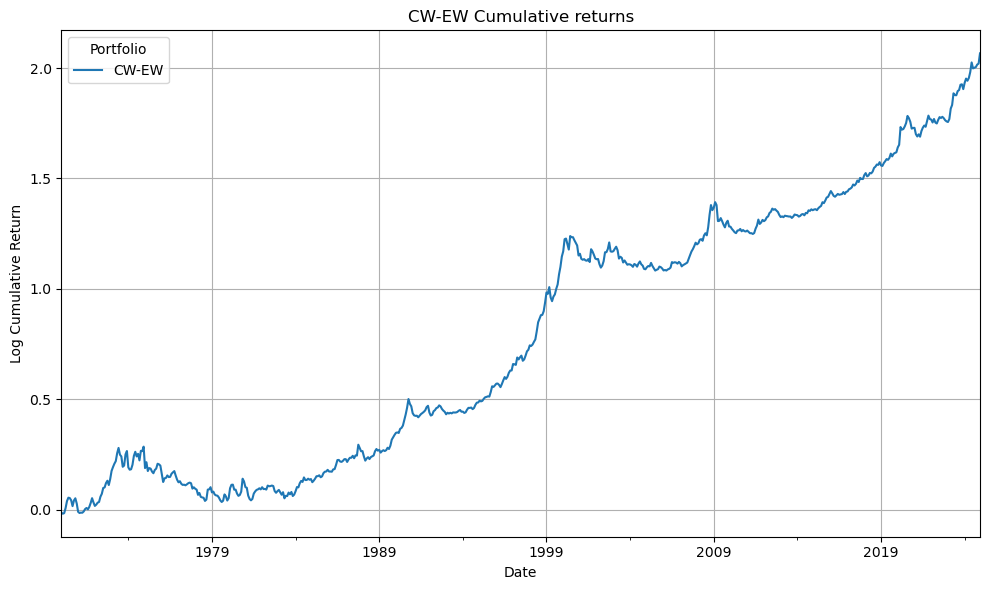

In [10]:
ba.plot_cumulative_returns(df_monthly,['CW-EW'],'CW-EW Cumulative returns')

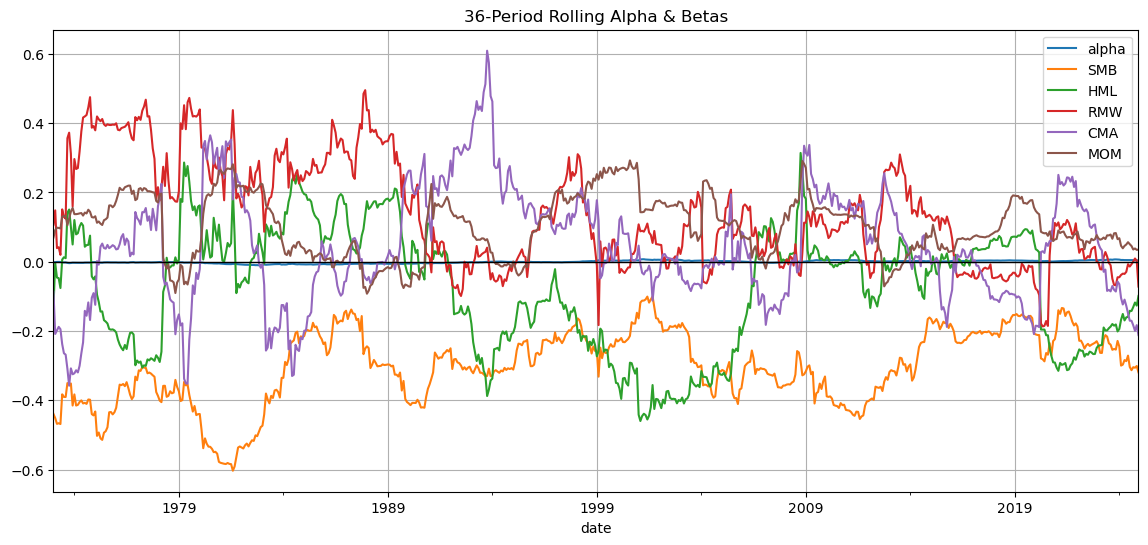

In [21]:
betas_monthly = ba.rolling_factor_betas(
    df_monthly,
    portfolio_col="CW-EW",
    factors=["SMB", "HML", "RMW", "CMA", "MOM"],
    window=36
)


### Daily 

In [15]:
df_daily = build_preference_factor_dataset(
    returns_file="sp500_returns_daily_with_tickers.csv",
    market_caps_file="sp500_market_caps_daily.csv",
    ff_factors_file="ff_factors_daily.csv",
    frequency="daily",
)


In [16]:
df_daily.head()

,CW,EW,CW-EW,MKT_RF,SMB,HML,RMW,CMA,RF,MOM
date,,,,,,,,,,
2018-01-02,0.008494,0.008031,0.000463,0.0085,0.0032,-0.0021,-0.0051,0.0022,0.0001,-0.0064
2018-01-03,0.006608,0.005611,0.000997,0.0059,-0.0047,-0.0019,-0.0071,-0.0007,0.0001,0.0021
2018-01-04,0.004364,0.003066,0.001298,0.0042,-0.0022,0.0024,-0.0002,0.0030,0.0001,-0.0020
2018-01-05,0.007134,0.005368,0.001766,0.0066,-0.0037,-0.0025,0.0039,-0.0038,0.0001,0.0061
2018-01-08,0.001901,0.003099,-0.001198,0.0019,-0.0020,0.0004,-0.0006,0.0004,0.0001,0.0016


In [17]:
df_daily.isna().any().any()


False

In [18]:
ba.run_capm(df_daily,'CW-EW')

,coef,t_stat
const,0.000259,2.496544
MKT_RF,-0.003612,-0.443247
R2,0.000112,NaN


In [19]:
ba.run_factor_model(df_daily,'CW-EW')

,coef,t_stat
const,0.000189,3.323430
MKT_RF,0.013725,2.857139
SMB,-0.229734,-25.005347
HML,-0.194562,-22.915429
RMW,0.011758,1.007248
CMA,-0.062767,-4.252600
MOM,0.083787,15.563927
R2,0.702891,NaN


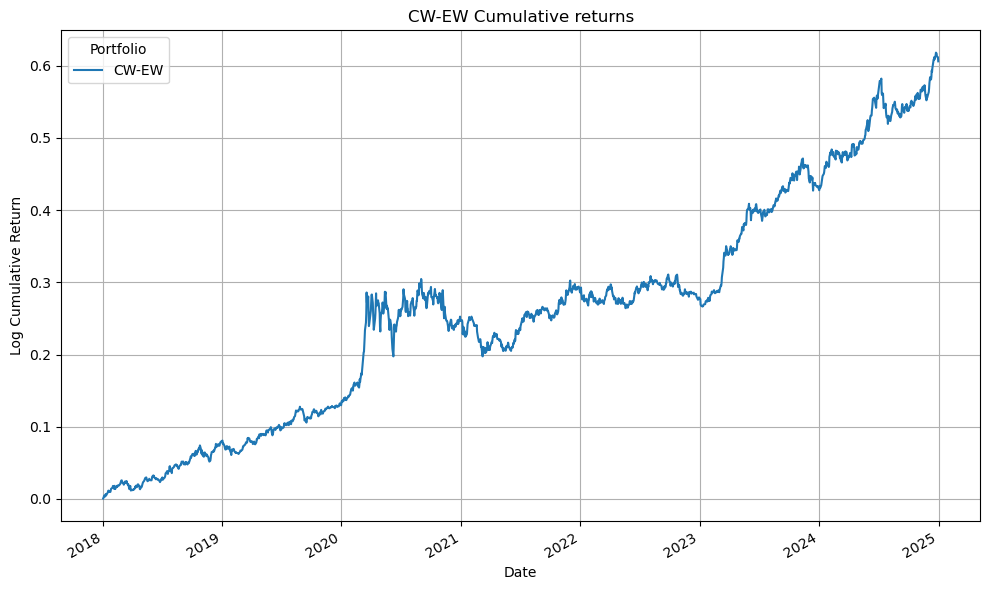

In [20]:
ba.plot_cumulative_returns(df_daily,['CW-EW'],'CW-EW Cumulative returns')

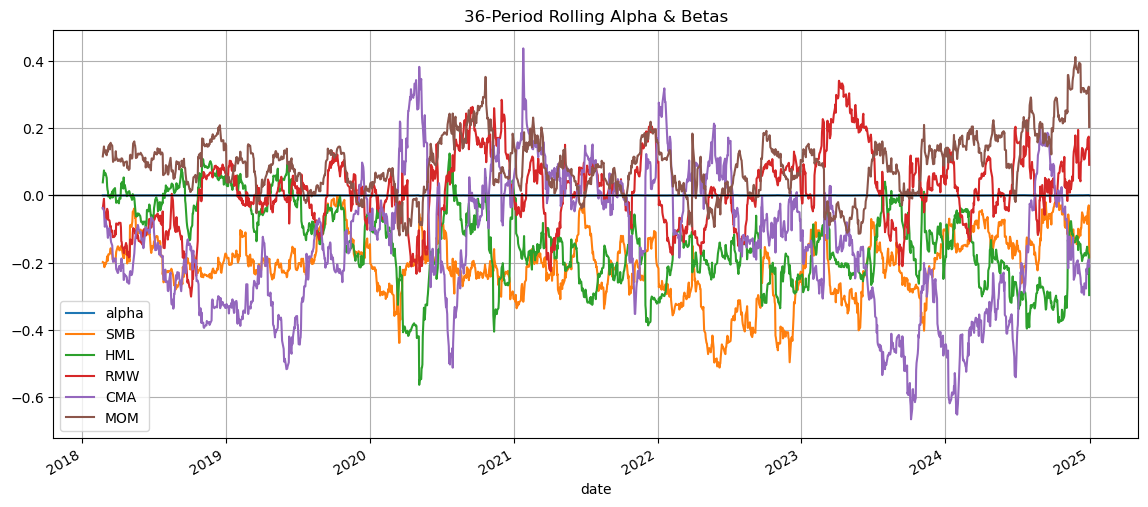

In [22]:
betas_daily= ba.rolling_factor_betas(
    df_daily,
    portfolio_col="CW-EW",
    factors=["SMB", "HML", "RMW", "CMA", "MOM"],
    window=36
)
